# Exploding & vanishing gradients


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, SimpleRNN, Dropout
from keras.initializers import he_uniform
from tensorflow.keras.optimizers import SGD
from pylab import rcParams

rcParams["figure.figsize"] = (16, 9)

DATA_PATH = "../data/raw"


In [28]:
data = np.load(os.path.join(DATA_PATH, "grad/data.npy"))
X_train = data[:500, :20]
X_test = data[500:, :20]
y_train = data[:500, 20:]
y_test = data[500:, 20:]


In [29]:
# Create a Keras model with one hidden Dense layer
model = Sequential()
model.add(
    Dense(25, input_dim=20, activation="relu", kernel_initializer=he_uniform(seed=42))
)
model.add(Dense(1, activation="linear"))

# Compile and fit the model
model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9))
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0
)

# See Mean Square Error for train and test data
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

# Print the values of MSE
print("Train: %.3f, Test: %.3f" % (train_mse, test_mse))

# Compile and fit the model
model.compile(
    loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9, clipvalue=3.0)
)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0
)

# See Mean Square Error for train and test data
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

# Print the values of MSE
print("Train: %.3f, Test: %.3f" % (train_mse, test_mse))


/media/prime/hdd/home/mersahl/venv/tfenv/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train: nan, Test: nan
Train: nan, Test: nan


## Vanishing gradient


In [30]:
history.history["acc"] = [
    0.5249379994735208,
    0.5232846516983408,
    0.5400936897791723,
    0.5208046294976674,
    0.5373381099513032,
    0.5337558559689453,
    0.5343069717078605,
    0.5376136680219613,
    0.5312758338421821,
    0.5310002758207976,
    0.5348580878902381,
    0.5411959217497389,
    0.5133645635690529,
    0.5332047398769024,
    0.5538715903146039,
    0.5238357677246854,
    0.547809314205483,
    0.5406448060600972,
    0.5395425740238325,
    0.5447781758634931,
    0.544227060157427,
    0.5378892259940723,
    0.5282446957219235,
    0.5290713698189263,
    0.5467070821527936,
    0.5301736018716156,
    0.5445026180966888,
    0.5310002755990663,
    0.5370625519956167,
    0.5513915681714163,
    0.539267016002448,
    0.5373381100005767,
    0.5340314139410561,
    0.5276935798598242,
    0.5445026181459623,
    0.5508404522107698,
    0.5359603196719226,
    0.5508404522271944,
    0.5403692480879863,
    0.5362358776768826,
    0.5406448060765218,
    0.5224579777655834,
    0.5445026181295378,
    0.5508404521943453,
    0.5282446955823149,
    0.5398181317413632,
    0.5450537340901843,
    0.5533204742389857,
    0.5285202538582798,
    0.5356847619708165,
]
history.history["val_acc"] = [
    0.4752475291785627,
    0.5297029673463047,
    0.46039603753845293,
    0.5346534688874046,
    0.5297029673463047,
    0.4702970261621003,
    0.47277228165381024,
    0.5346534688874046,
    0.5297029702970297,
    0.5346534688874046,
    0.5297029673463047,
    0.46782177863734786,
    0.5569306907087269,
    0.5346534594450847,
    0.48514851632684763,
    0.5470296941181221,
    0.4752475291785627,
    0.5470296941181221,
    0.5346534718381296,
    0.542079211461662,
    0.4975247619175675,
    0.5346534623958097,
    0.5371287164121571,
    0.542079211461662,
    0.5445544589864145,
    0.5371287069698372,
    0.5272277292638722,
    0.5470296941181221,
    0.5346534594450847,
    0.5396039515438646,
    0.5346534688874046,
    0.5247524846898447,
    0.5346534594450847,
    0.5123762470660823,
    0.5470296941181221,
    0.46782177863734786,
    0.5371287164121571,
    0.5371287069698372,
    0.47277228165381024,
    0.5371287193628821,
    0.5371287164121571,
    0.49504950642585754,
    0.5420792020193421,
    0.5346534594450847,
    0.5495049540359195,
    0.5321782148710572,
    0.542079211461662,
    0.5396039668876346,
    0.5470296970688471,
    0.5396039639369096,
]


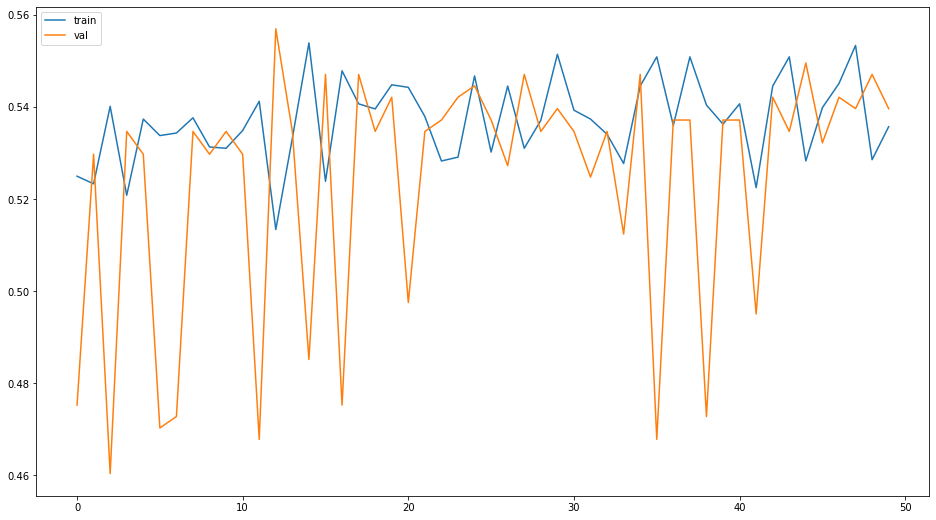

In [31]:
# Create the model
model = Sequential()
model.add(SimpleRNN(units=600, input_shape=(None, 1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Load pre-trained weights
model.load_weights(os.path.join(DATA_PATH, "grad/model_weights.h5"))

# Plot the accuracy x epoch graph
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["train", "val"], loc="upper left")
plt.show()


## GRU & LSTM


In [32]:
SimpleRNN_model = load_model(os.path.join(DATA_PATH, "gru/SimpleRNN_model.h5"))
gru_model = load_model(os.path.join(DATA_PATH, "gru/gru_model.h5"))


In [33]:
# Import the modules
from keras.layers import GRU, Dense

# Print the old and new model summaries
SimpleRNN_model.summary()
gru_model.summary()

# Evaluate the models' performance (ignore the loss value)
_, acc_simpleRNN = SimpleRNN_model.evaluate(X_test, y_test, verbose=0)
_, acc_GRU = gru_model.evaluate(X_test, y_test, verbose=0)

# Print the results
print("SimpleRNN model's accuracy:\t{0}".format(acc_simpleRNN))
print("GRU model's accuracy:\t{0}".format(acc_GRU))


Model: "simple_rnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________
Model: "gru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               49920     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,049
Traina

In [34]:
test = np.load(os.path.join(DATA_PATH, "lstm/test.npy"))
y_test = test[:, -1]
X_test = test[:, :-1].reshape((len(y_test), -1, 1))


In [35]:
# Import the LSTM layer
from keras.layers.recurrent import LSTM

# Build model
model = Sequential()
model.add(LSTM(units=128, input_shape=(None, 1), return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Load pre-trained weights
model.load_weights(os.path.join(DATA_PATH, "lstm/lstm_stack_model_weights.h5"))

print(
    "Loss: %0.04f\nAccuracy: %0.04f" % tuple(model.evaluate(X_test, y_test, verbose=0))
)


Loss: 0.6789
Accuracy: 0.5590


## The embedding layer


In [36]:
vocabulary_size = 80001
sentence_len = 200
wordvec_dim = 300
model_onehot = load_model(os.path.join(DATA_PATH, "embed/model_onehot.h5"))


In [37]:
# Import the embedding layer
from keras.layers import Embedding

# Create a model with embeddings
model = Sequential(name="emb_model")
model.add(
    Embedding(
        input_dim=vocabulary_size + 1,
        output_dim=wordvec_dim,
        input_length=sentence_len,
        trainable=True,
    )
)
model.add(GRU(128))
model.add(Dense(1))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print the summaries of the one-hot model
model_onehot.summary()

# Print the summaries of the model with embeddings
model.summary()


Model: "model_onehot"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               49920     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________
Model: "emb_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 300)          24000600  
                                                                 
 gru_2 (GRU)                 (None, 128)               165120    
                                                                 
 dense_10 (Dense)            (N

In [38]:
import pickle
from zipfile import ZipFile
from keras.initializers import Constant


In [39]:
def load_glove(filename):
    with ZipFile(filename) as myzip:
        with myzip.open("tl_glove_200k.pickle") as myfile:
            glove = pickle.load(myfile)

    return glove


In [40]:
vocabulary_size = 10000
wordvec_dim = 200


In [41]:
# Load the glove pre-trained vectors
glove_matrix = load_glove(os.path.join(DATA_PATH, "embed/glove_200d.zip"))

# Create a model with embeddings
model = Sequential(name="emb_model")
model.add(
    Embedding(
        input_dim=vocabulary_size + 1,
        output_dim=wordvec_dim,
        embeddings_initializer=Constant(glove_matrix),
        input_length=sentence_len,
        trainable=False,
    )
)
model.add(GRU(128))
model.add(Dense(1))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print the summaries of the model with embeddings
model.summary()


Model: "emb_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 200)          2000200   
                                                                 
 gru_3 (GRU)                 (None, 128)               126720    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,127,049
Trainable params: 126,849
Non-trainable params: 2,000,200
_________________________________________________________________


In [42]:
acc_simpleRNN = 0.495
max_vocabulary = 5000
max_len = 120
wordvec_dim = 100


In [43]:
# Create the model with embedding
model = Sequential(name="emb_model")
model.add(
    Embedding(input_dim=max_vocabulary, output_dim=wordvec_dim, input_length=max_len)
)
model.add(SimpleRNN(units=128))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Load pre-trained weights
model.load_weights(os.path.join(DATA_PATH, "embed/embedding_model_weights.h5"))

# Evaluate the models' performance (ignore the loss value)
_, acc_embeddings = model.evaluate(X_test, y_test, verbose=0)

# Print the results
print(
    "SimpleRNN model's accuracy:\t{0}\nEmbeddings model's accuracy:\t{1}".format(
        acc_simpleRNN, acc_embeddings
    )
)


SimpleRNN model's accuracy:	0.495
Embeddings model's accuracy:	0.7329999804496765


## Better sentiment classification


In [44]:
max_text_len = 800
vocabulary_size = 20000
test = np.load(os.path.join(DATA_PATH, "embed/test.npy"))
X_test = test[:, :-1]
y_test = test[:, -1]


In [45]:
# Build and compile the model
model = Sequential()
model.add(
    Embedding(vocabulary_size, wordvec_dim, trainable=True, input_length=max_text_len)
)
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(16))
model.add(Dropout(rate=0.25))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Load pre-trained weights
model.load_weights(os.path.join(DATA_PATH, "embed/model_weights.h5"))

# Print the obtained loss and accuracy
print("Loss: {0}\nAccuracy: {1}".format(*model.evaluate(X_test, y_test, verbose=0)))


Loss: 1.0716614723205566
Accuracy: 0.8220000267028809


## Using CNN layer


In [61]:
from keras.layers.convolutional import Conv1D, MaxPooling1D

model_cnn = Sequential(
    layers=[
        Embedding(
            vocabulary_size + 1, wordvec_dim, trainable=True, input_length=max_text_len
        ),
        Dropout(0.2),
        Conv1D(filters=16, kernel_size=(4,)),
        MaxPooling1D(),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(16),
        Dense(1),
    ]
)

model_cnn.compile("adam", "categorical_crossentropy")

# model_cnn.layers[6].units
# units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False


In [62]:
# Print the model summary
model_cnn.summary()

# Load pre-trained weights
model_cnn.load_weights(os.path.join(DATA_PATH, "conv/model_weights.h5"))


# Evaluate the model to get the loss and accuracy values
# loss, acc = model_cnn.evaluate(X_test, y_test, verbose=0)
_ = model_cnn.evaluate(X_test, y_test, verbose=0)
_
# Print the loss and accuracy obtained
# print("Loss: {0}\nAccuracy: {1}".format(loss, acc))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 800, 100)          2000100   
                                                                 
 dropout_22 (Dropout)        (None, 800, 100)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 797, 16)           6416      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 398, 16)          0         
 1D)                                                             
                                                                 
 dropout_23 (Dropout)        (None, 398, 16)           0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                20736     
                                                     

6.091595139423589e-08